In [2]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance
from utils import smooth

# q1 and baseliens curves

baselines ICM (5, 10)
baselines Disagreement (5, 10)
baselines E3B (5, 10)
baselines RND (5, 10)
baselines PseudoCounts (5, 10)
baselines RIDE (5, 10)
baselines RE3 (5, 10)
baselines NGU (5, 10)
q1 ICM (5, 10)
q1 Disagreement (5, 10)
q1 E3B (5, 10)
q1 RND (5, 10)
q1 PseudoCounts (5, 10)
q1 RIDE (5, 10)
q1 RE3 (5, 10)
q1 NGU (5, 10)


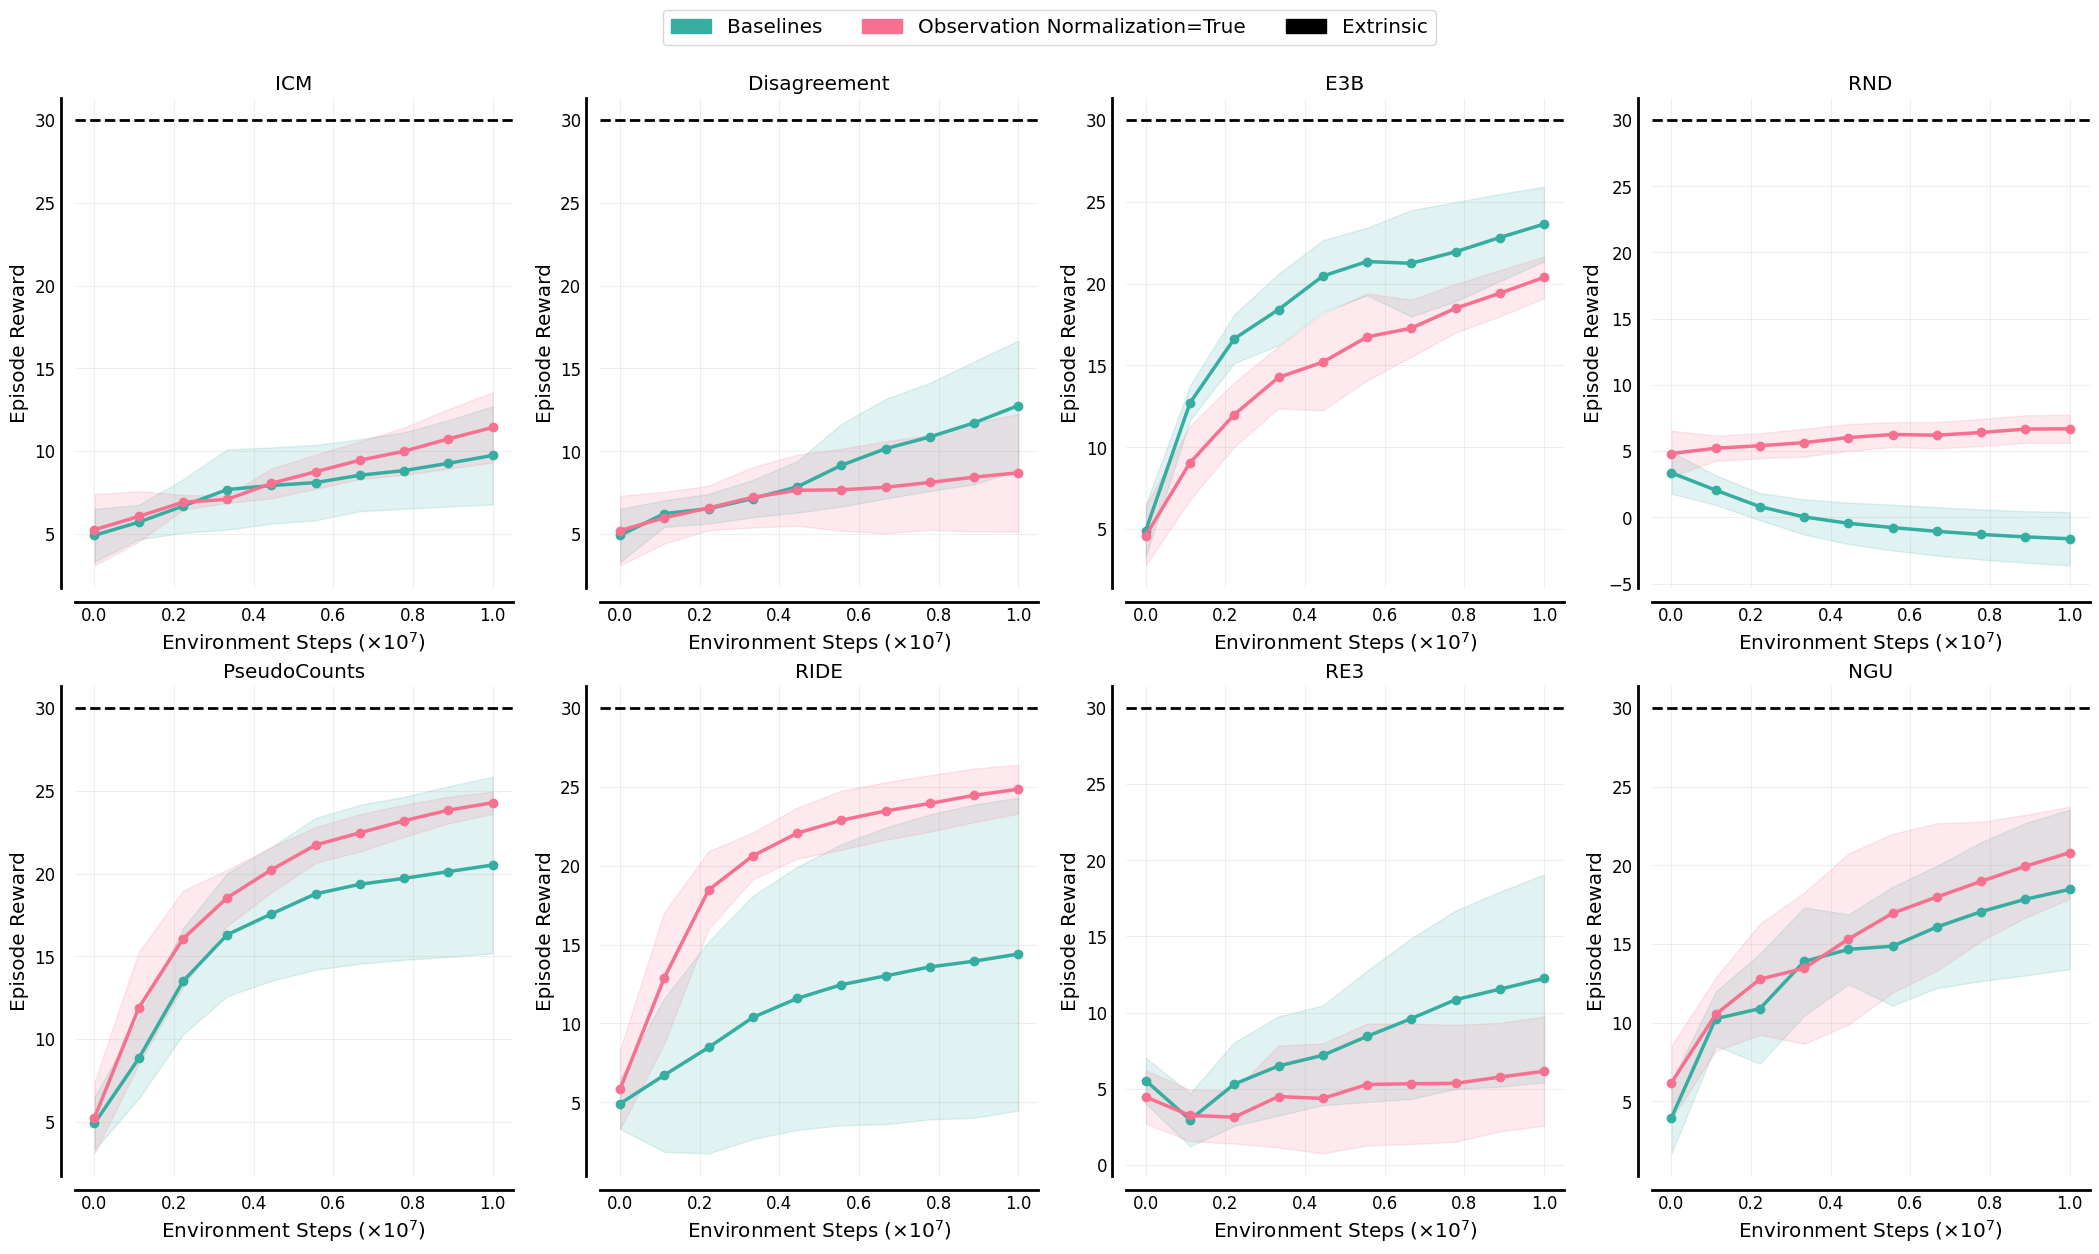

In [16]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
candidates = ['baselines', 'q1']
legends = ['Baselines', 'Observation Normalization=True', 'Extrinsic']
colors = sns.husl_palette(len(candidates), h=.5)
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(candidates)]
fake_patches.append(mpatches.Patch(color='k', label="Extrinsic"))

fig, axes = plt.subplots(2, 4, figsize=(26, 14))

for subplot_idx, candidate in enumerate(candidates):
    root = f"./data/{candidate}/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                data = smooth(data, 0.95)
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        print(candidate, algo, all_data[algo].shape)

    for algo_idx, algo in enumerate(algos):
        mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1.0, num_points)
        if subplot_idx == 0:
            ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=colors[subplot_idx])
        # ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, legends, loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq1_curves.pdf', bbox_inches='tight', dpi=300)

In [1]:
# algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
# titles = ['Baselines', 'Observation Normalization']
# # colors = sns.color_palette("husl", len(algos))
# colors = sns.husl_palette(len(algos), h=.5)
# fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(algos)]

# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# for subplot_idx, candidate in enumerate(['baselines', 'q1']):
#     root = f"./data/{candidate}/"
#     num_points = 10
#     all_data = {algo: [] for algo in algos}

#     ax = axes[subplot_idx]

#     for algo in algos:
#         for dir in os.listdir(root):
#             if algo.lower() in dir:
#                 file = f"{root}/{dir}/"
#                 file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
#                 data = pd.read_csv(file)['episode_reward']
#                 data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
#                 data = smooth(data, 0.95)
#                 all_data[algo].append(data)

#         all_data[algo] = np.array(all_data[algo])

#     x = np.linspace(0, 1, num_points)
#     ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
#     for algo, color in zip(algos, colors):
#         mean, std = np.mean(all_data[algo], axis=0), np.std(all_data[algo], axis=0)
#         ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=color, label=algo)
#         ax.fill_between(x, mean+std, mean-std, alpha=0.15, color=color)

#     ax.set_title(titles[subplot_idx], fontsize="x-large")
#     ax = _annotate_and_decorate_axis(ax, 
#                                     ticklabelsize="large",
#                                     xlabel=r"Environment Steps ($\times 10^7$)", 
#                                     ylabel="Episode Reward",
#                                     xticklabels=np.linspace(0, 1, num_points),
#                                     )
# fig.legend(fake_patches, algos, loc='upper center', 
#     fancybox=True, ncol=4,
#     fontsize='x-large',
#     bbox_to_anchor=(0.5, 1.1))
# fig.savefig('figure_baselines_q1_curves.pdf', bbox_inches='tight', dpi=300)